In [1]:
using DifferentialEquations
using PyCall
# pygui(:qt)
using PyPlot
# pygui(true)
include("leap_frog_definitions.jl")
include("PSS_Definitions_Dimer_X.jl")
include("orbit_plots_leapfrog_dimer.jl")

plot_orbits_leapfrog_lab (generic function with 1 method)

In [2]:
H=.125
h=1/(2*H)
max_time=100
a=(2+h-2*sqrt(h+1))/h
Y=Yfind_Aref(1e-3,0,H);
Yfind(h)=sqrt(h/(2h+1));
P=Yfind(H)


0.31622776601683794

In [3]:
q1=0
# q2=0
# p2=P

# q2=sqrt(6)/3
# p2=0

p1=P1_poly(q2,p2,H)

Q1=(q1+q2)/sqrt(2)
Q2=(q1-q2)/sqrt(2)
P1=(p1[1]+p2)/sqrt(2)
P2=(p1[1]-p2)/sqrt(2);
println(p1)

0.26517784817967405


In [4]:
u0=[Q1;P2;Q2;P1;0;0] # X P Q Y
Q0=[Q1,Q2]; P0=[P1,P2];
tspan = (0.0,max_time);

In [5]:
# Aref_Hamiltonian(Q0[2],P0[2],0)
Aref_Hamiltonian(Q0,P0,0)

0.125

In [6]:
prob = ODEProblem(Eq_of_M_LAB_FRAME,u0,tspan)
t,A=solve(prob,Tsit5(),reltol=1e-8,abstol=1e-11,maxiters=1e15);

In [7]:
N=length(t.t)
Z=A[1,:]+im *A[2,:];
W=A[3,:]+im *A[4,:];
# Energy=zeros(N)
# for k=1:N
#     Energy[k]=abs(1/(1+Z[k]^2)-1/(1+W[k]^2))
# end

In [8]:
Q1=A[1,:]
Q2=A[3,:]
P1=A[4,:]
P2=A[2,:];

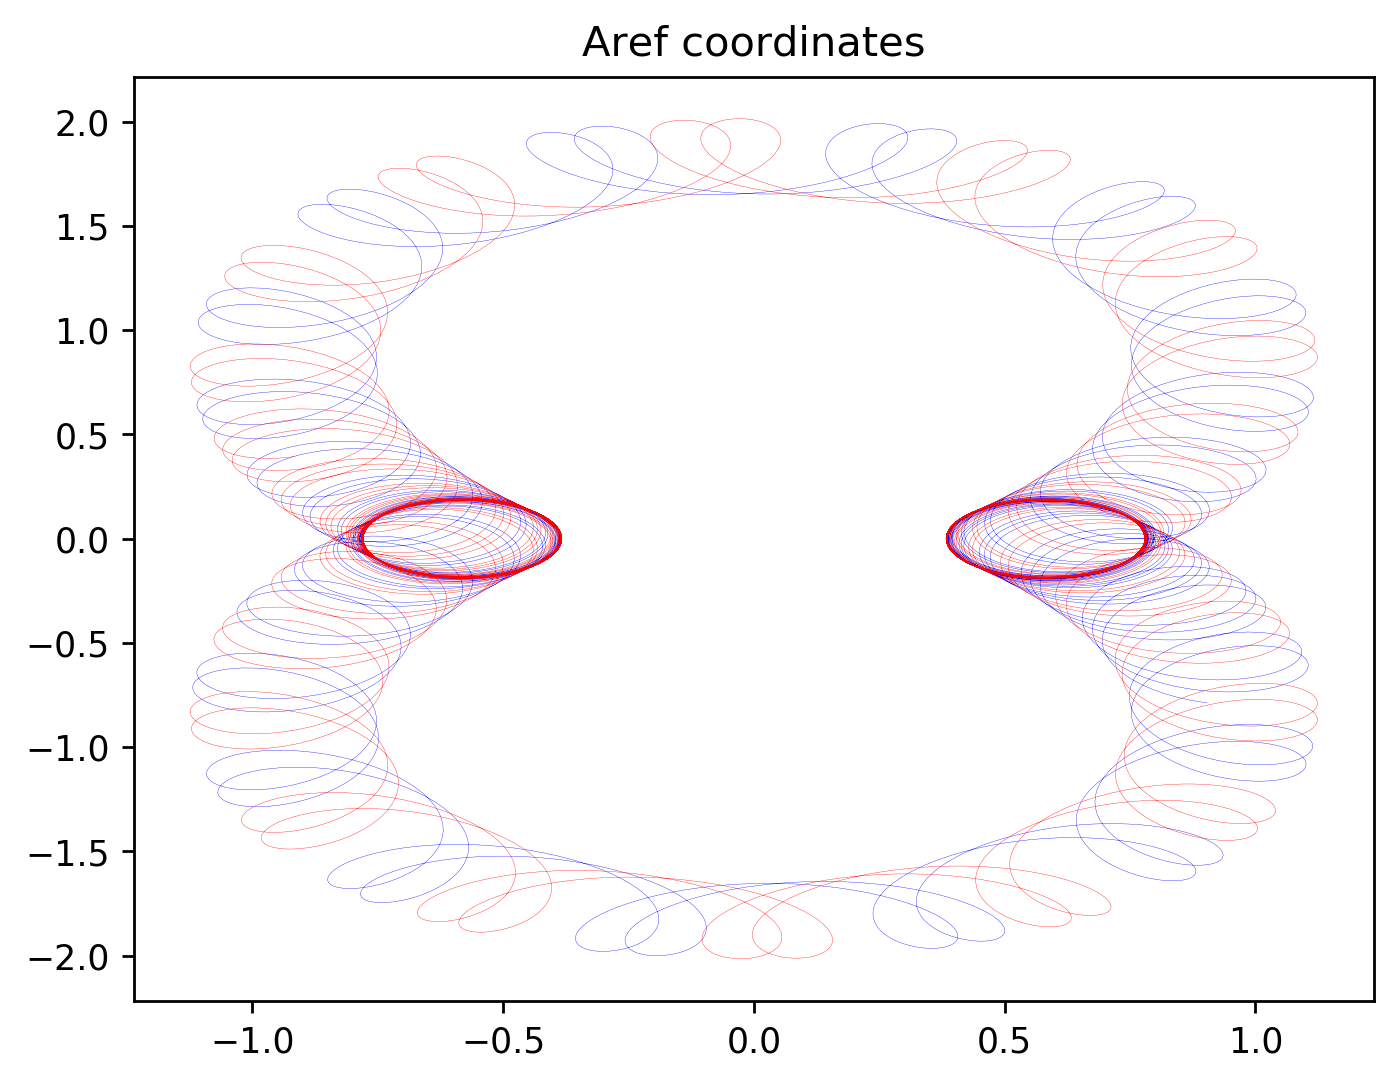

In [9]:
figure(dpi=250)
plot(Q1,P1,"b",linewidth=.1)
plot(Q2,P2,"r",linewidth=.1)
title("Aref coordinates");

In [10]:
q1=(Q1+Q2)/sqrt(2)
q2=(Q1-Q2)/sqrt(2)
p1=(P1+P2)/sqrt(2)
p2=(P1-P2)/sqrt(2)

5888-element Array{Float64,1}:
  0.0                   
 -0.00045730629460071534
 -0.0008683431943568903 
 -0.0012998530793848727 
 -0.001673307918280337  
 -0.001982860608185232  
 -0.002200927678289499  
 -0.0023233816383817175 
 -0.002346164993748884  
 -0.0022702202676798096 
 -0.002099677873205259  
 -0.001838871387863804  
 -0.0014936278638337246 
  ⋮                     
 -0.7348701851164819    
 -0.7431563801757618    
 -0.7515821253012495    
 -0.7601914557784843    
 -0.7691127148157637    
 -0.7783472983237816    
 -0.7880727738329033    
 -0.7982439435837182    
 -0.8088789868721874    
 -0.819811238848084     
 -0.8308187700127838    
 -0.835381392841782     

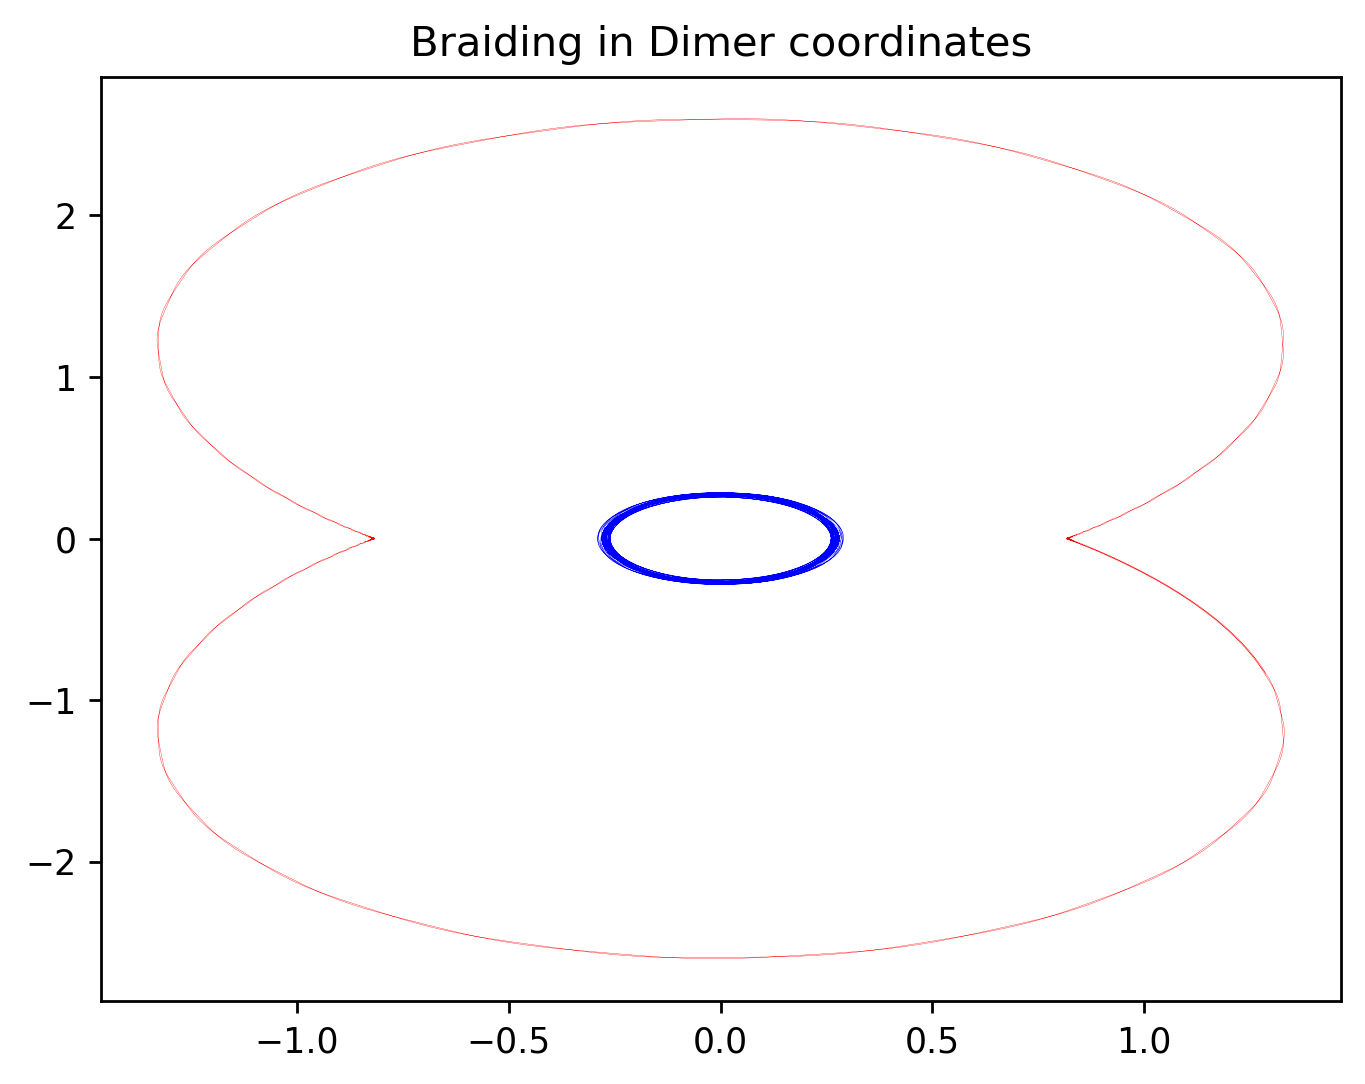

In [11]:
figure(dpi=250)
plot(q1,p1,"b",linewidth=.1)
plot(q2,p2,"r",linewidth=.1)
title("Braiding in Dimer coordinates");

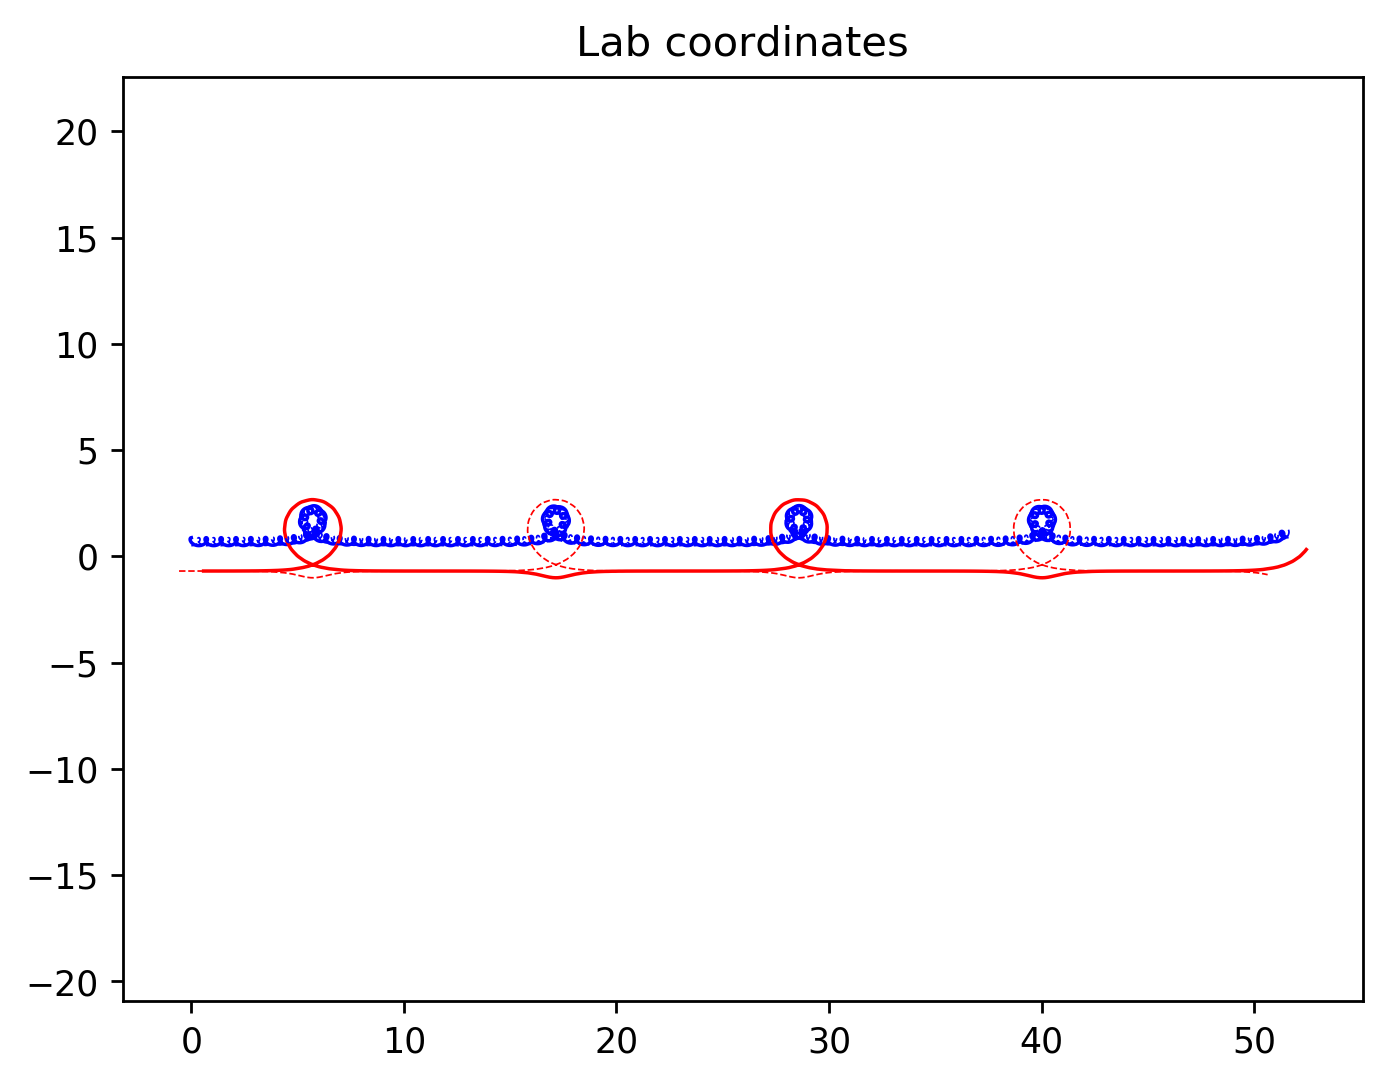

In [12]:
Centeroid=A[5,:]+im *A[6,:];

lin_impulse=im*(1+a )*ones(N);
z_1pos=.5*(Centeroid+Z+lin_impulse+W);
z_1neg=.5*(Centeroid+Z-lin_impulse-W);
z_2pos=.5*(Centeroid-Z+lin_impulse-W);
z_2neg=.5*(Centeroid-Z-lin_impulse+W);

z_1posX=real(z_1pos)
z_1posY=imag(z_1pos)

z_2posX=real(z_2pos)
z_2posY=imag(z_2pos)

z_1negX=real(z_1neg)
z_1negY=imag(z_1neg)

z_2negX=real(z_2neg)
z_2negY=imag(z_2neg)

figure(dpi=250)
plot(z_1posX,z_1posY,c="b",linewidth=1)
plot(z_1negX,z_1negY,c="r",linewidth=1)
plot(z_2posX,z_2posY,c="b",linewidth=.5,linestyle="--")
plot(z_2negX,z_2negY,c="r",linewidth=.5,linestyle="--")
ylim(-3.2,3.2)
axis("equal")
title("Lab coordinates");

The Poincare' Surface of section for this orbit is 

In [13]:
# N_iter_Q=10;#50
# Q_start=-.3
# Q_end=.3
# N_iter_P=10
# P_start=-.01
# P_end=.01;

# ArrP=range(P_start,stop=P_end,length=N_iter_P)
# ArrQ=range(Q_start,stop=Q_end,length=N_iter_Q)

# Brandons_Colors=["#393b79" ,"#5254a3","#6b6ecf","#9c9ede" ,"#637939","#8ca252" ,"#b5cf6b" ,"#cedb9c" ,"#8c6d31","#bd9e39" ,"#e7ba52","#e7cb94","#843c39","#ad494a" ,"#d6616b","#e7969c" ,"#7b4173" ,"#a55194","#ce6dbd" ,"#de9ed6"];

In [14]:
# figure()
# @time Q_PSS,P_PSS=PSS_function(q20, p20, H, 1e6);
# plot(Q_PSS,P_PSS,".", markersize=2, c="k");
# # @time Q_PSS,P_PSS=PSS_function(q2, -p2, H, 1e4);
# # plot(Q_PSS,P_PSS,".", markersize=2, c="k");
# # @time Q_PSS,P_PSS=PSS_function(-q2, p2, H, 1e4);
# # plot(Q_PSS,P_PSS,".", markersize=2, c="k");
# # @time Q_PSS,P_PSS=PSS_function(-q2, -p2, H, 1e4);
# # plot(Q_PSS,P_PSS,".", markersize=2, c="k");

In [15]:
# @time for k=1:N_iter_P
#     for j=1:N_iter_Q
#         Q_PSS,P_PSS,dH=PSS_function(ArrQ[j], ArrP[k], H, t_max)       
#         current_color=Brandons_Colors[mod(j,length(Brandons_Colors))+1]
#         if dH!=1
#             plot(P_PSS,Q_PSS,".", markersize=.1,c=current_color);
#         end
#     end
# end
# xlabel("P")
# ylabel("Q")
# xlim(-.01,.01) 
# ylim(-.3,.3) 